In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import cv2

In [36]:
file_path = "detecciones_1.csv"
df = pd.read_csv(file_path, delimiter=';')

df.head()

,Frame,Clase,ID,Xmin,Ymin,Xmax,Ymax
0,1,car,1,577.027710,665.707764,697.557617,944.806091
1,1,car,2,771.923950,782.932983,897.620361,1044.038818
2,1,pedestrian,3,1180.557617,534.157837,1248.079346,573.943726
3,1,pedestrian,4,959.293213,826.174316,1007.505798,877.235840
4,1,pedestrian,5,696.434204,1025.335938,752.854858,1073.993408


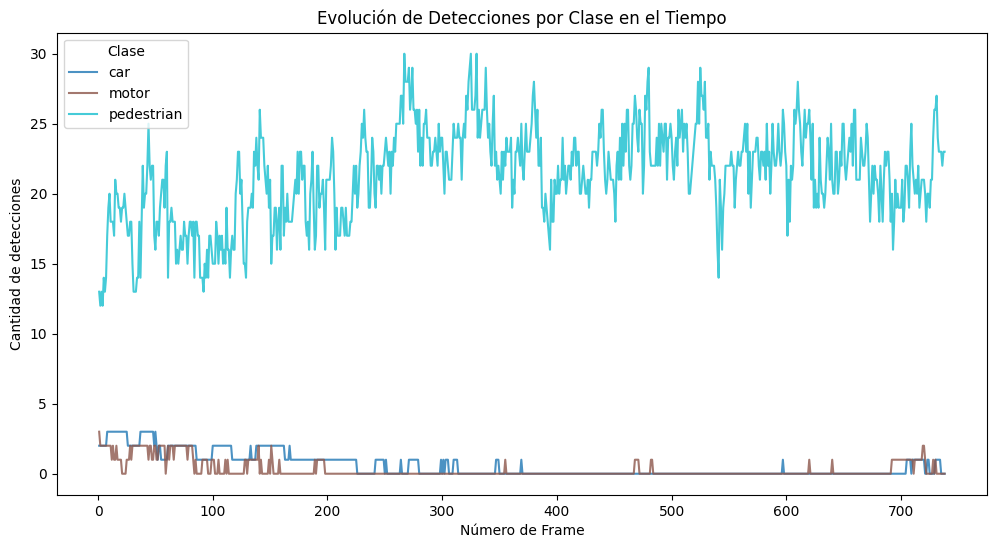

In [37]:
#Grafico lineas
detections_per_frame = df.groupby(["Frame", "Clase"]).size().unstack(fill_value=0)
detections_per_frame.plot(figsize=(12, 6), colormap="tab10", alpha=0.8)
plt.xlabel("Número de Frame")
plt.ylabel("Cantidad de detecciones")
plt.title("Evolución de Detecciones por Clase en el Tiempo")
plt.legend(title="Clase")
plt.show()

c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

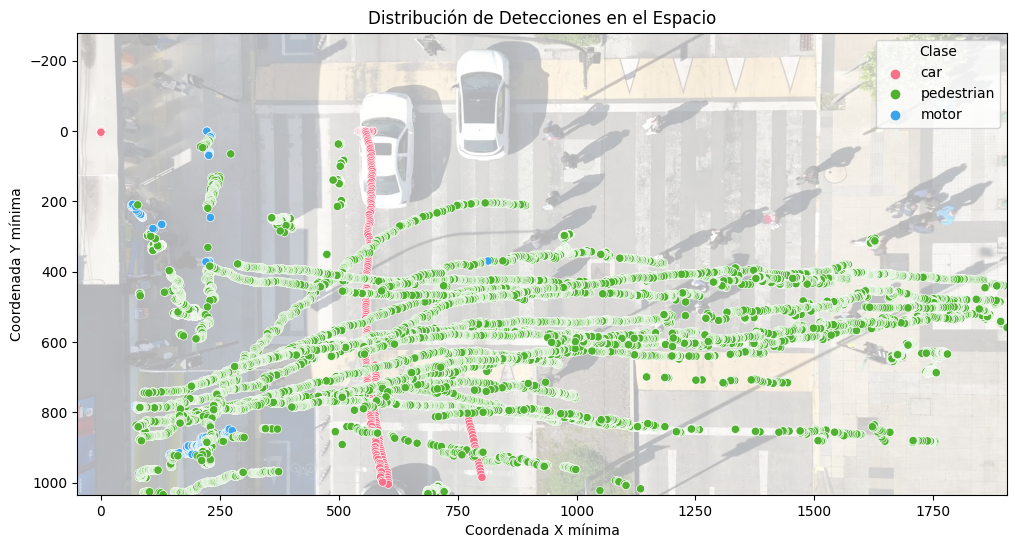

In [39]:
img = mpimg.imread("frame_inicial.jpg")

plt.figure(figsize=(12, 6))
plt.imshow(img, extent=[df["Xmin"].min() - 50, df["Xmin"].max(), df["Ymin"].min() - 280, df["Ymin"].max()], aspect='auto', alpha=0.3)
sns.scatterplot(x=df["Xmin"], y=df["Ymin"], hue=df["Clase"], palette="husl")
plt.xlabel("Coordenada X mínima")
plt.ylabel("Coordenada Y mínima")
plt.title("Distribución de Detecciones en el Espacio")
plt.gca().invert_yaxis()
plt.legend(title="Clase", bbox_to_anchor=(1, 1))

plt.show()



c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

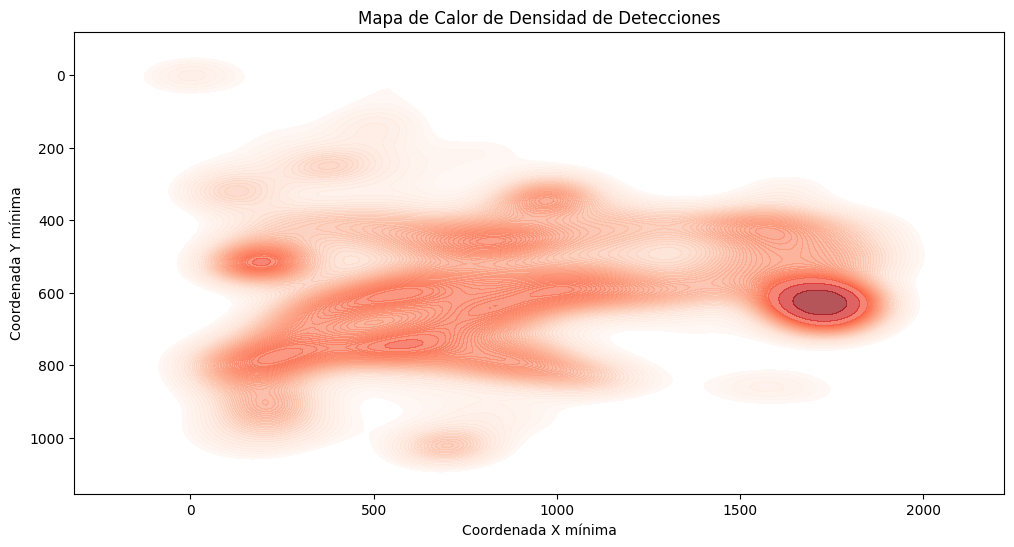

In [40]:
#Mapa calor
plt.figure(figsize=(12, 6))
sns.kdeplot(x=df["Xmin"], y=df["Ymin"], cmap="Reds", fill=True, levels=50, alpha=0.7)
plt.xlabel("Coordenada X mínima")
plt.ylabel("Coordenada Y mínima")
plt.title("Mapa de Calor de Densidad de Detecciones")

plt.gca().invert_yaxis()

plt.show()